# Exercise 5

- 이번 과제에서는 한국, 독일, 일본, 그리고 미국의 산업생산지수 data를 이용해 수업 시간에 다룬 여러 계량모형들에 대한 실습을 진행합니다.

#### (1) 국가별 산업생산지수의 월별 추이를 그리시오. 

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('production_index.csv', index_col=0, parse_dates=True)
cols = df.columns
df['date'] = df.index.date
df.head()

,kor_pi,ger_pi,jap_pi,usa_pi,date
항목명1,,,,,
1989-01-01,19.0,67.3,98.9,61.9,1989-01-01
1989-02-01,18.9,67.0,98.3,61.6,1989-02-01
1989-03-01,19.1,67.5,101.8,61.8,1989-03-01
1989-04-01,18.1,69.6,100.2,61.7,1989-04-01
1989-05-01,19.3,66.2,100.3,61.4,1989-05-01


Text(0.5, 0, 'National index of industrial product progress')

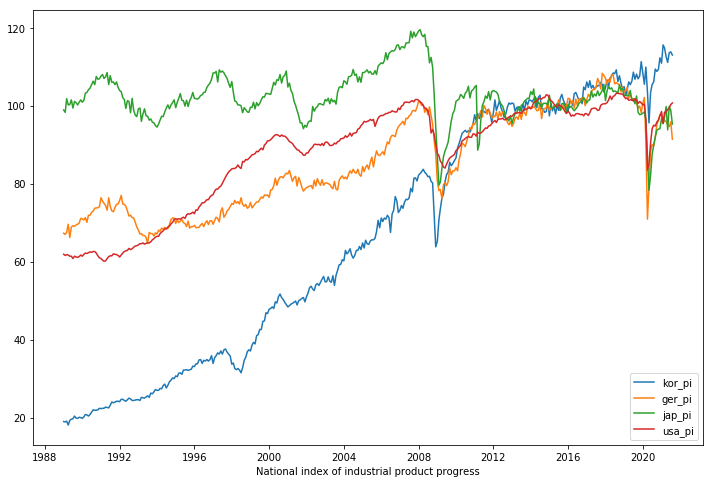

In [2]:
plt.figure(figsize = (12,8))
plt.plot(df.kor_pi) ; plt.plot(df.ger_pi) ; plt.plot(df.jap_pi) ; plt.plot(df.usa_pi)
plt.legend()
plt.xlabel('National index of industrial product progress')

#### (2) 최소자승법으로 다음의 모형을 추정하시오.
$$y_{kor} = \beta_0 + \beta_1y_{jp} + \beta_2y_{ger} + \beta_3y_{usa} + \epsilon$$
이 모형에서 발생하는 문제가 무엇이며 이를 어디서 확인할 수 있나요?

A. 먼저 독립변수 kor_pi의 분포가 skewed되어있어 symmetric하지 않고
usa_pi와 ger_pi의 corr이 0.85로 높은 수준이어서 multicollinearity문제가 있다. 이를 corr에서 확인할 수 있음

또한 이경우는 non-stationary한 data로 regress했기 때문에 Spurious regression이라고 볼 수 있다. 따라서 아래의 회귀분석은 성립할 수 없는 회귀분석이다. 아래의 분석 결과도 살펴보면 t와 R^2, F등의 통계치가 매우 유의미하게 나왔는데 더빈 왓슨이 2에서 한참 떨어진 0.3정도 이므로 가성적 회귀모형임을 확인할 수 있다

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


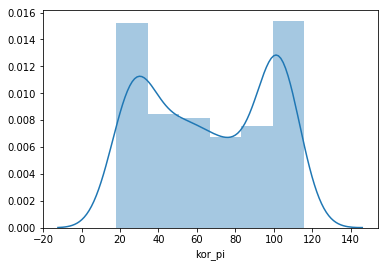

In [3]:
sns.distplot(df.kor_pi)

In [4]:
y = df.kor_pi
X = df.iloc[0:,1:4]
X = sm.add_constant(X)
X.corr()

,const,ger_pi,jap_pi,usa_pi
const,NaN,NaN,NaN,NaN
ger_pi,NaN,1.000000,0.154049,0.858491
jap_pi,NaN,0.154049,1.000000,0.158112
usa_pi,NaN,0.858491,0.158112,1.000000


In [5]:
ols = sm.OLS(y,X)
res = ols.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 kor_pi   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     2064.
Date:                Sun, 28 Nov 2021   Prob (F-statistic):          4.86e-238
Time:                        19:01:36   Log-Likelihood:                -1354.1
No. Observations:                 392   AIC:                             2716.
Df Residuals:                     388   BIC:                             2732.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -22.0297      6.688     -3.294      0.001     -35.179      -8.880
ger_pi         1.8587      0.061     30.591      0.000       1.739       1.978
jap_pi        -1.2321      0.064    -19.267      0.000      -1.358      -1.106
usa_pi         0.6343      0.056     11.280      0.000       0.524       0.745
==============================================================================
Omnibus:                       89.430   Durbin-Watson:                   0.323
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              321.926
Skew:                           0.978   Prob(JB):                     1.24e-70
Kurtosis:                       6.986   Cond. No.                     2.76e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### (3) 각 변수에 대해 단위근 검정을 진행하시오(단, regression = 'c'로 설정).

In [6]:
from statsmodels.tsa.stattools import adfuller

adfuller(df.kor_pi, regression='c') #한국 5%수준에서 불안정

(-0.4204933391755398,
 0.906620484423682,
 10,
 381,
 {'1%': -3.4476305904172904,
  '5%': -2.869155980820355,
  '10%': -2.570827146203181},
 1425.1384069496098)

In [7]:
adfuller(df.jap_pi, regression='c') #일본 안정적인 모형

(-3.6547067873104937,
 0.004797278514957843,
 2,
 389,
 {'1%': -3.447272819026727,
  '5%': -2.868998737588248,
  '10%': -2.5707433189709294},
 1584.1600518119537)

In [8]:
adfuller(df.ger_pi, regression='c') #독일 1%수준에서 불안정

(-1.6253927990338255,
 0.4699032121007456,
 2,
 389,
 {'1%': -3.447272819026727,
  '5%': -2.868998737588248,
  '10%': -2.5707433189709294},
 1534.4678568441584)

In [9]:
adfuller(df.usa_pi, regression='c') #미국 1%수준에서 불안정

(-1.6514746154565696,
 0.4562714828601089,
 2,
 389,
 {'1%': -3.447272819026727,
  '5%': -2.868998737588248,
  '10%': -2.5707433189709294},
 1033.9203090415158)

#### (4) 각 변수들의 원자료를 변화율로 바꾼 후, 이들에 대해 다시 단위근 검정을 진행하시오(단, regression = 'c'로 설정).

In [10]:
k=df.kor_pi.pct_change() ; kor_pi_pct = k.dropna()
j=df.jap_pi.pct_change() ; jap_pi_pct = j.dropna()
g=df.ger_pi.pct_change() ; ger_pi_pct = g.dropna()
u=df.usa_pi.pct_change() ; usa_pi_pct = u.dropna()

In [11]:
adfuller(kor_pi_pct, regression='c') #한국 안정적

(-21.735849100797008,
 0.0,
 0,
 390,
 {'1%': -3.4472291365835566,
  '5%': -2.8689795375849223,
  '10%': -2.5707330834976987},
 -1774.008621747591)

In [12]:
adfuller(jap_pi_pct, regression='c') #일본 불안정적

(-18.321375489615477,
 2.2654736427201124e-30,
 0,
 390,
 {'1%': -3.4472291365835566,
  '5%': -2.8689795375849223,
  '10%': -2.5707330834976987},
 -1836.781812256374)

In [13]:
adfuller(ger_pi_pct, regression='c') #독일 불안정적

(-16.902122560134078,
 1.0257974578000344e-29,
 1,
 389,
 {'1%': -3.447272819026727,
  '5%': -2.868998737588248,
  '10%': -2.5707433189709294},
 -1805.4209877288022)

In [14]:
adfuller(usa_pi_pct, regression='c') #미국 불안정적

(-14.08726362089455,
 2.7612899474285917e-26,
 1,
 389,
 {'1%': -3.447272819026727,
  '5%': -2.868998737588248,
  '10%': -2.5707433189709294},
 -2350.20040893434)

#### (5) 일본의 산업생산지수 원자료(변화율 x)에 대해, acf와 pacf를 그리시오. 이로부터 어떤 결론을 도출할 수 있나요?

A. acf는 지수적으로 감소하는 모습을 보이면서 0으로 수렴하고, pacf는 절단된모습을 보이므로 AR모형으로 분석해야한다.

<Figure size 432x288 with 0 Axes>

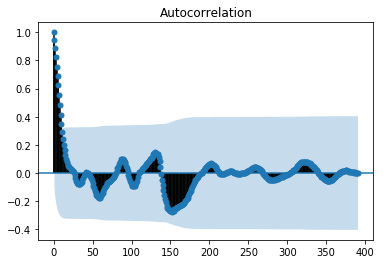

In [15]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plot_acf(df.jap_pi)  #acf
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


<Figure size 432x288 with 0 Axes>

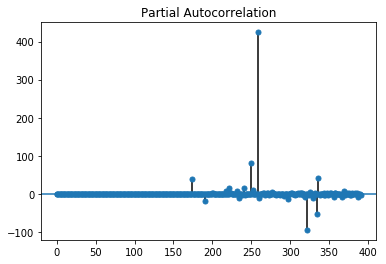

In [16]:
plt.figure()
plot_pacf(df.jap_pi)   #pacf
plt.show()

#### (6) 일본의 산업생산지수를 ARMA(p,q)로 modeling한다고 하자. 이때, AIC와 BIC를 기준으로 최적의 p, q를 도출하시오.

In [17]:
res = sm.tsa.arma_order_select_ic(np.array(df.jap_pi.dropna()), ic=["aic", "bic"], trend="nc")

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arra

In [18]:
res.aic_min_order

(1, 0)

In [19]:
res.bic_min_order

(1, 0)

#### (7) 위의 결과를 바탕으로 일본의 산업생산지수에 대한 ARMA(p,q) 모형을 만들고, ARMA 모형에서 예측된 값과 실제 값을 산포도로 그리시오. 산포도를 기준으로 판단했을때, 일본의 산업생산지수에 대한 ARMA 모형은 괜찮은 모형입니까?

In [20]:
m2 = sm.tsa.ARMA(np.array(df.jap_pi.dropna()), (1, 0))
r2 = m2.fit(disp=False)
print(r2.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  392
Model:                     ARMA(1, 0)   Log Likelihood                -825.294
Method:                       css-mle   S.D. of innovations              1.981
Date:                Sun, 28 Nov 2021   AIC                           1656.587
Time:                        19:01:42   BIC                           1668.501
Sample:                             0   HQIC                          1661.309
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.9236      1.793     56.835      0.000      98.409     105.438
ar.L1.y        0.9464      0.016     59.481      0.000       0.915       0.978
                                    Roots           

In [21]:
ar1 = []
x_0 = 0
for i in range(392) : 
    np.random.seed(i)
    ar1.append(101.9236 + 0.9464 * x_0 + np.random.normal())
    x_0 = ar1[-1]

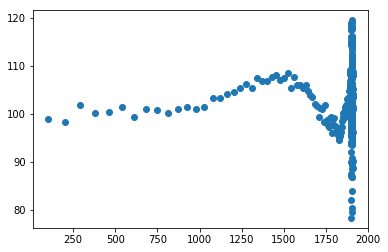

In [22]:
plt.scatter(ar1,df.jap_pi)

실제값과 예측된 값은 다르다 => 일본의 산업생산지수에 대한 ARMA 모형은 괜찮은 모형이 아니다